<a href="https://colab.research.google.com/github/adela-domokosova/test/blob/main/template_coursework_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template for coursework - Part 1 Classification

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import joblib
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import os
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix

## Team identification

seminar day and time
* Monday 18:00-19:30

team number
* ?

Team members:
* Marek Machcinik
* Frederik Majza
* Lam Ngo
* Tomáš Rindt
* Adéla Domokošová

# Introduction

1.	Describe the business value of addressing this problem with machine learning.
2.	Provide the link to the source of the data.

1. #TO DO


2.
https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?resource=download

In [18]:
# TO BE deleted
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Customization

1.	What is the *target attribute*
2.	What is the *instance of interest*   The instance can be identified, for example, by an id.
3.	Choose an *attribute of interest*
5.	Show *Cost matrix* consisting of a cost of a false positive, false negative, true positive and true negative. Note that cost of true positive and true negative is recommended to be zero.

1.
What is the target attribute: G3 — the final grade (numeric, 0–20). It represents the final academic performance of a student, often predicted based on demographics, lifestyle, and prior grades (G1, G2).

2.
An instance of interest is a single student record identified by a unique combination of attributes such as: "school, sex, age, address, etc" We don't have an explicit ID column, so we will identify an instance by its row index in the dataset. For example: The instance of interest is the student in row 120, representing a 17-year-old female from GP school living in an urban area.

3.
A good attribute of interest is an independent variable. In our case, this would be: Dalc — workday alcohol consumption (1–5). It’s an important factor that could potentially affect academic results - grades.

4.
We used a cost matrix with values FN=20, FP=5, TP and TN are 0 because the model's primary goal is risk mitigation. We set a high cost for False Negatives (FN=20) to reflect the importance of identifying a student at risk of alcohol consumption. The low cost for False Positives (FP=5) acknowledges that a "false alarm" is also unwanted, but doesnt lead to too much damage.

# Data Exploration

1. Describe meaning of individual attributes
2.	Show a histogram (or a table with value frequencies) for the target variable and for selected other variables
3.	Show a scatterplot (correlation plot) showing the relation between selected predictors and the target variable
4.	Interpret the results


1.

school - Student's school ('GP' or 'MS').

sex - Student’s gender ('F' or 'M').

age - Age of student (numeric: 15–22).

address - Home address type ('U' = urban, 'R' = rural).

famsize - Family size ('LE3' ≤3 members, 'GT3' >3 members).

Pstatus - Parents’ cohabitation status ('T' = together, 'A' = apart).

Medu - Mother’s education (0–4 scale: none → higher education).

Fedu - Father’s education (0–4 scale: none → higher education).

Mjob - Mother’s job (teacher, health, services, at_home, other).

Fjob - Father’s job (teacher, health, services, at_home, other).

reason - Reason to choose this school (home, reputation, course, other).

guardian - Student’s guardian (mother, father, other).

traveltime - Home to school travel time (1 = <15 min, 4 = >1 hr).

studytime - Weekly study time (1 = <2 hrs, 4 = >10 hrs).

failures - Number of past class failures (numeric, capped at 4).

schoolsup - Extra educational support (yes/no).

famsup - Family educational support (yes/no).

paid - Extra paid classes (yes/no).

activities - Extra-curricular activities (yes/no).

nursery - Attended nursery school (yes/no).

higher - Wants to take higher education (yes/no).

internet - Internet access at home (yes/no).

romantic - In a romantic relationship (yes/no).

famrel - Quality of family relationships (1 = very bad, 5 = excellent).

freetime - Free time after school (1 = very low, 5 = very high).

goout - Time spent with friends (1 = very low, 5 = very high).

Dalc - Workday alcohol consumption (1–5). (Cílobý atribut)

Walc - Weekend alcohol consumption (1–5).

health - Current health status (1 = very bad, 5 = very good).

absences - Number of school absences (0–93).

G1 - First period grade (0–20).

G2 - Second period grade (0–20).

G3 - Final grade (0–20)

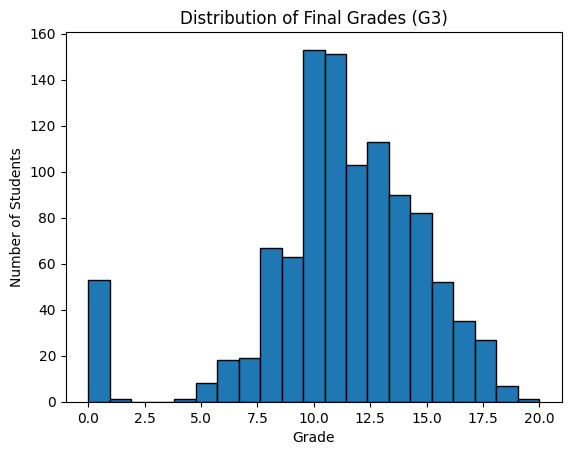

In [19]:


df = pd.read_csv("/content/drive/MyDrive/student-merged.csv")

plt.hist(df['G3'], bins=21, edgecolor='black')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.show()

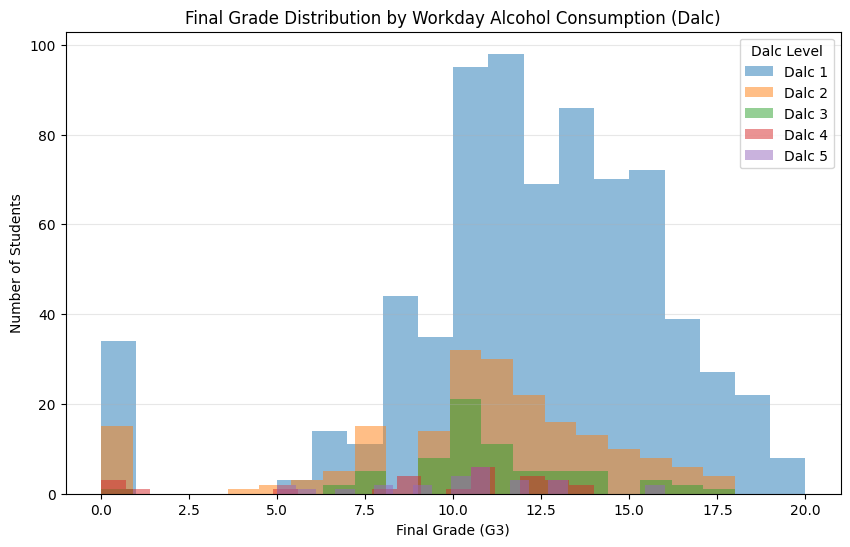

In [20]:
df = pd.read_csv("/content/drive/MyDrive/student-merged.csv") # TO DO change path

plt.figure(figsize=(10,6))

for dalc_level in sorted(df['Dalc'].unique()):
    subset = df[df['Dalc'] == dalc_level]
    plt.hist(
        subset['G3'],
        bins=20,
        alpha=0.5,
        label=f"Dalc {dalc_level}"
    )

plt.title("Final Grade Distribution by Workday Alcohol Consumption (Dalc)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.legend(title="Dalc Level")
plt.grid(axis='y', alpha=0.3)
plt.show()

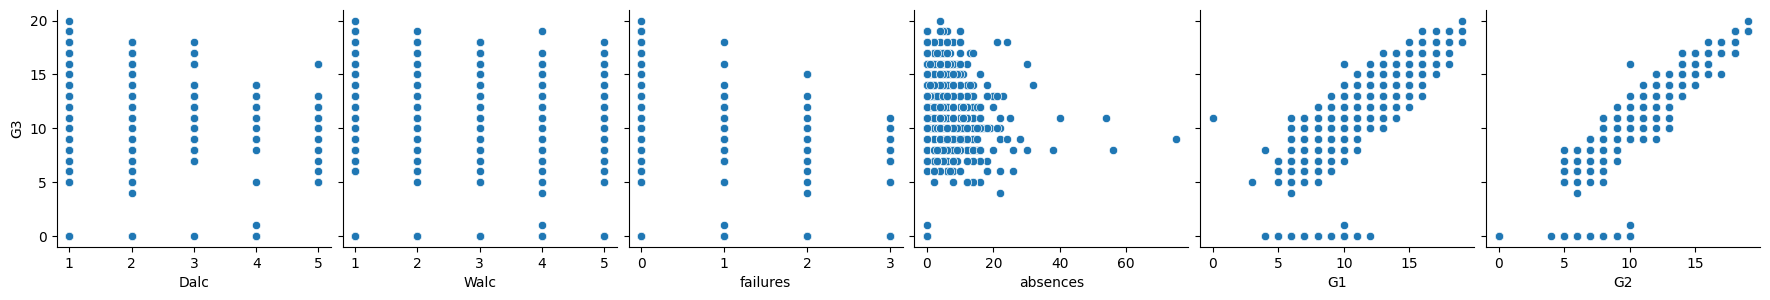

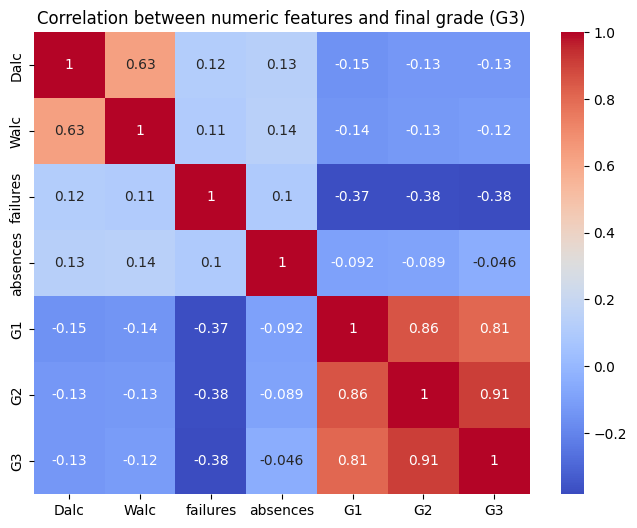

In [21]:
numeric_cols = [ 'Dalc', 'Walc', 'failures', 'absences', 'G1', 'G2']

sns.pairplot(df, x_vars=numeric_cols, y_vars='G3', height=3, aspect=1)
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols + ['G3']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between numeric features and final grade (G3)")
plt.show()

4.

Alcohol consumption during weekdays does affect academic performance, but only slightly.

Students who drink more tend to earn lower grades, especially at the extremes (Dalc 4–5), but the effect is small compared to academic predictors.

Academic performance is extremely consistent.

If a student has strong G1 and G2 grades, they almost always have a strong G3.

Past failures are an early warning sign.

They correlate much more strongly with G3 than Dalc or any behavioral factor.

Absences matter surprisingly little.

Their correlation with G3 is near zero.

High weekday drinking rarely appears among top performers.

The histogram confirms that heavier drinking groups almost never reach high grades, even though moderate drinkers overlap with light drinkers.

# Data preprocessing

## Preprocessing for supervised machine learning

To define our classification target, we transformed the ordinal variable Dalc (workday alcohol consumption, scale 1–5) into a binary attribute named Dalc_binary. We established a threshold where values of 2 and above represent the positive class ("At Risk"), while 1 represents the negative class ("Low Consumption").

We identified a strong correlation (0.64) between workday alcohol consumption (Dalc) and weekend alcohol consumption (Walc). To avoid data leak and prevent the model from relying on trivial predictors, we decided to remove Walc from the dataset entirely.

Finally, regarding class imbalance, we opted against using artificial oversampling techniques (such as SMOTE). With a class distribution of approximately 70:30, we believe the imbalance is manageable using algorithm-level adjustments.

### Derive binary target attribute (if not already binary)

In [22]:
df = pd.read_csv("/content/drive/MyDrive/student-merged.csv") # TO DO remove drive path

print(df.head())

# Derive binary target attribute
df['Dalc_binary'] = df['Dalc'].apply(lambda x: 1 if x >= 2 else 0)

# Check distribution of the new target
print(df['Dalc_binary'].value_counts())

# Drop Dalc and Walc
df = df.drop(columns=['Dalc'])
df.to_csv("student_preprocessed_with_walc.csv", index=False) # data saved for ablation studies
df = df.drop(columns=['Walc'])

# Save the preprocessed file
df.to_csv("student_preprocessed.csv", index=False)

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
Dalc_binary
0    727
1    317
Name: count, dtype: int64


### Train test split

In [23]:
df = pd.read_csv("student_preprocessed.csv")

X = df.drop(columns=['Dalc_binary'])
y = df['Dalc_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (835, 31)
Testing set size: (209, 31)


### Feature engineering

Do at least one additional data preprocessing, such as

-	Remove missing values
-	If the classes are imbalanced, you may upsample (or downsample) the training dataset.
-	Normalize values or use a standard scale
-	Remove rows based on subsetting
-	Derive new columns
-	Perform feature selection (remove some attributes)


Make sure that your preprocessing operation does not use information from the test set. It is therefore recommended to “fit” preprocessing on the training set and then apply it on the test set.

## Applying preprocessing on test data

In [24]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
# Add study_effort column
if 'studytime' in X_train.columns and 'failures' in X_train.columns:
    X_train['study_effort'] = X_train['studytime'] / (X_train['failures'] + 1)
    X_test['study_effort'] = X_test['studytime'] / (X_test['failures'] + 1)
# Average of parents education
if 'Medu' in X_train.columns and 'Fedu' in X_train.columns:
    X_train['avg_parent_edu'] = (X_train['Medu'] + X_train['Fedu']) / 2
    X_test['avg_parent_edu'] = (X_test['Medu'] + X_test['Fedu']) / 2
# Delete redundant attribute
to_drop = ['address', 'guardian', 'reason','Medu', 'Fedu']
X_train = X_train.drop(columns=[col for col in to_drop if col in X_train.columns], errors='ignore')
X_test = X_test.drop(columns=[col for col in to_drop if col in X_test.columns], errors='ignore')

# Save feature engineered data
X_train.to_csv("X_train_engineered.csv", index=False)
X_test.to_csv("X_test_engineered.csv", index=False)

## Modeling

* Train the model on training data, and evaluate the model on test data.
* Try at least two machine learning classification algorithms. It is recommended to try Decision Trees and Forests.


### Classifier 1 (decision tree)

* Try various combinations of metaparameters (such as tree depth for decision tree) and record the impact on predictive performance. You can use grid search cross-validation for this.
* Once you determine the best values, you can refit the model with the best parameter value on the entire training data.

In [25]:


# Load data
X_train = pd.read_csv("X_train_engineered.csv")
X_test = pd.read_csv("X_test_engineered.csv")
y_train = pd.read_csv("y_train.csv").squeeze()
y_test = pd.read_csv("y_test.csv").squeeze()

# Encoding
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True).reindex(
    columns=X_train_encoded.columns, fill_value=0
)

# Grid Search and Pruningem
dt_scorer = make_scorer(f1_score, average='macro')

param_grid = {
    'max_depth': range(3, 10),
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'class_weight': ['balanced']
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring=dt_scorer,
    n_jobs=-1
)

# We opted to hardcode some of the parameters, which caused decrease in accuracy but at the same time minimalised cost and number of FN

dt_grid.fit(X_train_encoded, y_train)

print(f"Best params found: {dt_grid.best_params_}")
print(f"Best F1-macro score (on CV): {dt_grid.best_score_:.3f}")

# Save model
# Save model answers for evaluation
best_dt_model = dt_grid.best_estimator_
y_pred_dt = best_dt_model.predict(X_test_encoded)
joblib.dump(best_dt_model, "decision_tree_model.pkl")
pd.Series(y_pred_dt, name="dt_pred").to_csv("y_pred_dt_classifier.csv", index=False)

Best params found: {'class_weight': 'balanced', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1-macro score (on CV): 0.668


### Classifier 2 (random forest)

* Try various combinations of metaparameters (such as  number of trees in a forest) and record the impact on predictive performance. You can use grid search cross-validation for this.
* Once you determine the best values, you can refit the model with the best parameter value on the entire training data.


In [26]:
# Load data
X_train = pd.read_csv("X_train_engineered.csv")
X_test = pd.read_csv("X_test_engineered.csv")
y_train = pd.read_csv("y_train.csv").squeeze()
y_test = pd.read_csv("y_test.csv").squeeze()

# Encode categorical features (one-hot encoding)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print("Train shape after encoding:", X_train.shape)
print("Test shape after encoding:", X_test.shape)

# Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save model
joblib.dump(rf_model, "random_forest_model.pkl")
pd.Series(y_pred, name="rf_pred").to_csv("y_pred_rf_classifier.csv", index=False)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Train shape after encoding: (835, 34)
Test shape after encoding: (209, 34)
Accuracy: 0.7511961722488039

Confusion Matrix:
 [[132  14]
 [ 38  25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.64      0.40      0.49        63

    accuracy                           0.75       209
   macro avg       0.71      0.65      0.66       209
weighted avg       0.74      0.75      0.73       209

Accuracy: 0.7511961722488039

Confusion Matrix:
 [[132  14]
 [ 38  25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.64      0.40      0.49        63

    accuracy                           0.75       209
   macro avg       0.71      0.65      0.66       209
weighted avg       0.74      0.75      0.73       209



### Classifier 3 (baseline)

* Fit a baseline model, e.g., a model that predicts the most frequent class in the training data

In [27]:
y_train = pd.read_csv("y_train.csv").iloc[:, 0]
y_test  = pd.read_csv("y_test.csv").iloc[:, 0]

# Find most common class
most_frequent_class = y_train.mode()[0]
print(f"Most frequent class in y_train: {most_frequent_class}")

# Predictions for test set
y_pred_baseline = pd.Series(
    np.full(shape=y_test.shape, fill_value=most_frequent_class),
    name="baseline_pred"
)

# Save predictions
y_pred_baseline.to_csv("y_pred_baseline_classifier3.csv", index=False)


Most frequent class in y_train: 0


# Evaluation

### Classifier 1 (decision tree)

* Compute accuracy and F1 score on test data (you can include also other measures)
* Show confusion matrix
* Multiply the predefined costs with the confusion matrix to get the overall cost of the model

=== Decision Tree Metrics ===
Accuracy: 0.675
F1 Score (Macro): 0.629

Detailed classification report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76       146
           1       0.47      0.54      0.50        63

    accuracy                           0.67       209
   macro avg       0.63      0.64      0.63       209
weighted avg       0.69      0.67      0.68       209


Confusion matrix:
                       Pred 0  Pred 1
Actual 0 (low Dalc)      107      39
Actual 1 (high Dalc)      29      34
Total cost of the model: 775


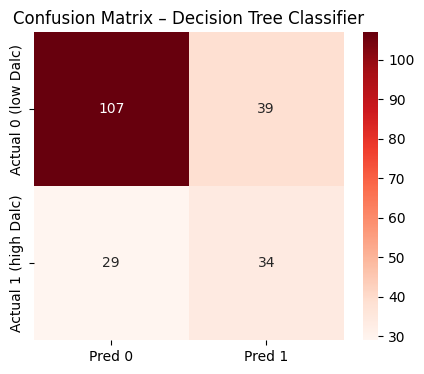

In [28]:
# Load data
y_test = pd.read_csv("y_test.csv").squeeze()
y_pred_dt = pd.read_csv("y_pred_dt_classifier.csv").squeeze()

# Accuracy & F1
accuracy = accuracy_score(y_test, y_pred_dt)
f1_macro = f1_score(y_test, y_pred_dt, average='macro')

print("=== Decision Tree Metrics ===")
print(f"Accuracy: {accuracy:.3f}")
print(f"F1 Score (Macro): {f1_macro:.3f}")
print("\nDetailed classification report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
cm_df = pd.DataFrame(cm, index=['Actual 0 (low Dalc)', 'Actual 1 (high Dalc)'],
                     columns=['Pred 0', 'Pred 1'])

print("\nConfusion matrix:\n", cm_df)

# Cost Matrix
# Cost Matrix: [[TN=0, FP=5], [FN=20, TP=0]]
cost_matrix = np.array([[0, 5], [20, 0]])

total_cost = np.sum(cm * cost_matrix)
print(f"Total cost of the model: {total_cost}")

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix – Decision Tree Classifier")
plt.show()

### Classifier 2 (random forest)

* Compute accuracy and F1 score on test data (you can include also other measures)
* Show confusion matrix
* Multiply the predefined costs with the confusion matrix to get the overall cost of the model

Accuracy: 0.751
F1 Score: 0.49

Detailed classification report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.64      0.40      0.49        63

    accuracy                           0.75       209
   macro avg       0.71      0.65      0.66       209
weighted avg       0.74      0.75      0.73       209


Confusion matrix:
                       Pred 0  Pred 1
Actual 0 (low Dalc)      132      14
Actual 1 (high Dalc)      38      25


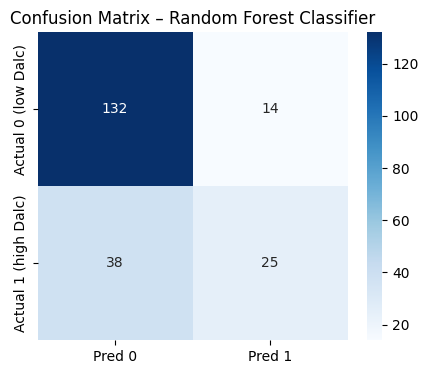

 Total cost of the model: 830


In [29]:
# Load data
X_train = pd.read_csv("X_train_engineered.csv")
X_test = pd.read_csv("X_test_engineered.csv")
y_test = pd.read_csv("y_test.csv").squeeze()

# One-Hot encoding
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Load model
best_rf = joblib.load("random_forest_model.pkl")

# Predictions
y_pred = best_rf.predict(X_test_encoded)

# Accuracy & F1
accuracy_best_rf = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", round(accuracy_best_rf, 3))
print("F1 Score:", round(f1, 3))
print("\nDetailed classification report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0 (low Dalc)', 'Actual 1 (high Dalc)'],
                        columns=['Pred 0', 'Pred 1'])

print("\nConfusion matrix:\n", cm_df)

# Graphs
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Random Forest Classifier")
plt.show()

# Cost Matrix
cost_matrix = np.array([[0, 5],   # [TN, FP]
                        [20, 0]]) # [FN, TP]

total_cost = np.sum(cm * cost_matrix)
print(" Total cost of the model:", total_cost)

### Classifier 3 (baseline)

* Compute accuracy and F1 score on test data (you can include also other measures)
* Show confusion matrix
* Multiply the predefined costs with the confusion matrix to get the overall cost of the model

In [30]:
# Load data and model predistions
y_test = pd.read_csv("y_test.csv").iloc[:, 0]
y_pred = pd.read_csv("y_pred_baseline_classifier3.csv").iloc[:, 0]

# Metrics
acc = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average="macro")
f1_weighted = f1_score(y_test, y_pred, average="weighted")

print("=== Metrics (Classifier 3 — Baseline) ===")
print(f"Accuracy:      {acc:.4f}")
print(f"F1 (macro):    {f1_macro:.4f}")
print(f"F1 (weighted): {f1_weighted:.4f}")

# Confusion matrix
labels = pd.Index(sorted(set(pd.unique(y_test)) | set(pd.unique(y_pred))))
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=pd.Index(labels, name="Actual"),
                         columns=pd.Index(labels, name="Predicted"))

print("\nConfusion Matrix:")
display(cm_df)

# Total cost
BIN_COSTS = {"TP": 0, "TN": 0, "FP": 5, "FN": 20}
if len(labels) == 2:
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=list(labels)).ravel()
    total_cost_bin = (tp * BIN_COSTS["TP"] +
                      tn * BIN_COSTS["TN"] +
                      fp * BIN_COSTS["FP"] +
                      fn * BIN_COSTS["FN"])
    print("\n=== Cost (binary FP/FN/TP/TN) ===")
    print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")
    print(f"Total cost (binary schema): {total_cost_bin:.4f}")

def load_or_make_cost_matrix(lbls: pd.Index) -> pd.DataFrame:
    if os.path.exists("cost_matrix.csv"):
        C = pd.read_csv("cost_matrix.csv", index_col=0)
        C = C.reindex(index=lbls, columns=lbls)
        if C.isnull().any().any():
            raise ValueError("cost_matrix.csv neobsahuje všechny třídy nebo nesedí pořadí.")
        return C
    else:
        C = pd.DataFrame(np.ones((len(lbls), len(lbls))), index=lbls, columns=lbls)
        np.fill_diagonal(C.values, 0.0)
        return C

C_df = load_or_make_cost_matrix(labels)
total_cost_general = float((cm_df.values * C_df.values).sum())

# Save results
cm_df.to_csv("confusion_matrix_baseline.csv")
pd.DataFrame(
    {"metric": ["accuracy", "f1_macro", "f1_weighted"],
     "value":  [acc,        f1_macro,  f1_weighted]}
).to_csv("metrics_baseline.csv", index=False)


=== Metrics (Classifier 3 — Baseline) ===
Accuracy:      0.6986
F1 (macro):    0.4113
F1 (weighted): 0.5746

Confusion Matrix:


Predicted,0,1
Actual,,
0,146,0
1,63,0



=== Cost (binary FP/FN/TP/TN) ===
TN=146, FP=0, FN=63, TP=0
Total cost (binary schema): 1260.0000


### Summary

* Which metric is most suitable for use for the current problem (accuracy, F-measure)?
* Compare the performance metrics for all types of models (e.g,. decision tree and forest). Which model is the best one?
* Combine (multiply) the predefined costs matrix with the values in the confusion matrix for each model. Which model is the best one?


In [31]:
# TO DO

# Explanation

## Global explanation

### Classifier 1 - decision tree

* Visualize the decision tree
* Looking at the tree, list the most important attributes

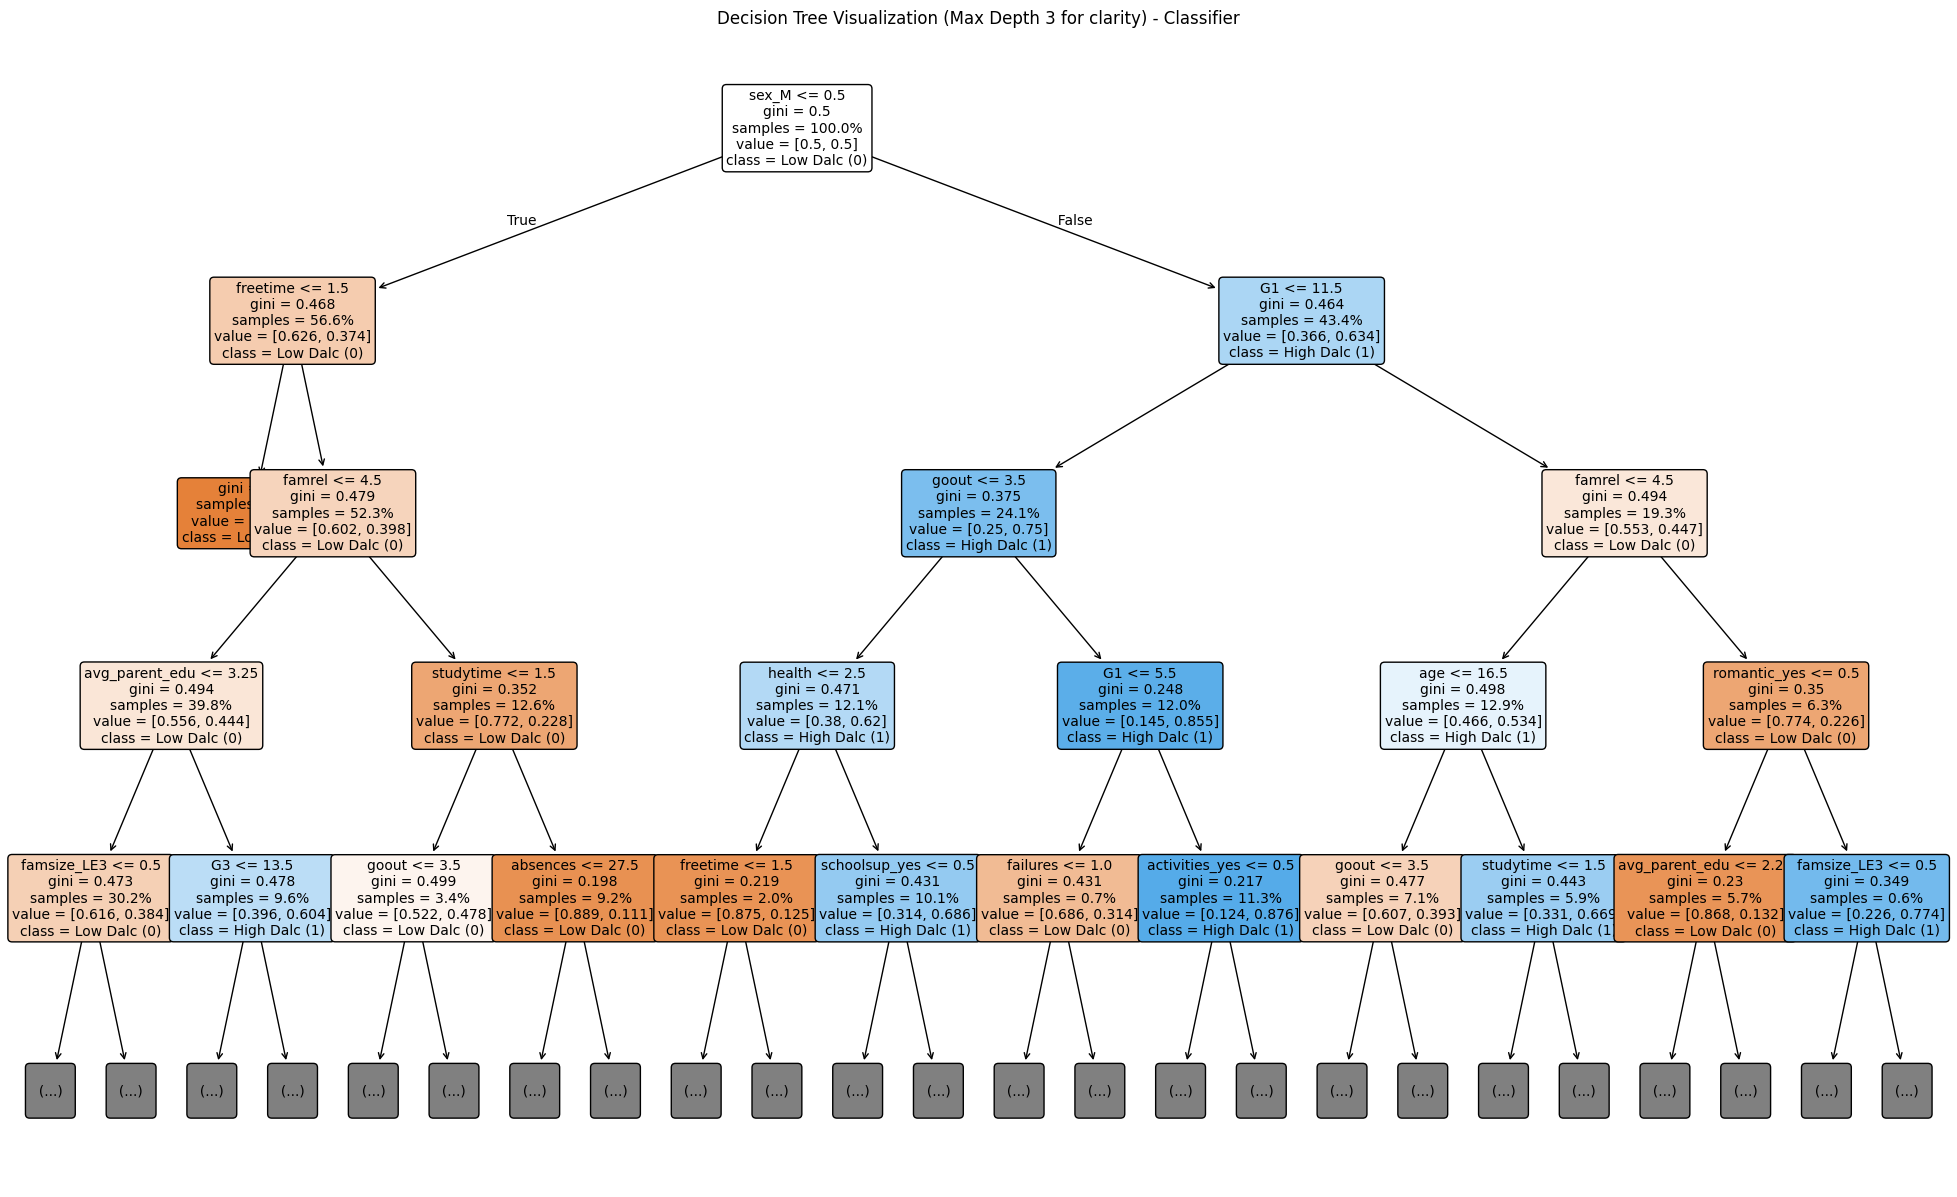

Top 5 most important features for Decision Tree Model:
 Feature  Importance
   goout    0.095443
   sex_M    0.084229
      G1    0.076071
absences    0.066791
      G2    0.060399


In [32]:
# LabelEncoder is not needed for model_1 preprocessing

# Load the trained Decision Tree model (Classifier 1: from bO5tuw0hnYk1)
best_dt_model = joblib.load("decision_tree_model.pkl")

# Recreate X_train_encoded exactly as it was when decision_tree_model_1.pkl was trained
# (from cell bO5tuw0hnYk1)
X_train_original = pd.read_csv("X_train_engineered.csv")
# In bO5tuw0hnYk1, X_train was passed directly to get_dummies. Let's replicate that.
X_train_for_features = pd.get_dummies(X_train_original, drop_first=True)

# Now, feature_names should correctly match the model's expected features
feature_names = X_train_for_features.columns.tolist()

# Visualize the decision tree
plt.figure(figsize=(25, 15))
plot_tree(
    best_dt_model,
    feature_names=feature_names,
    class_names=['Low Dalc (0)', 'High Dalc (1)'],
    filled=True,
    rounded=True,
    proportion=True,
    fontsize=10,
    max_depth=4 # Limit depth to 3 for clarity

)
plt.title("Decision Tree Visualization (Max Depth 3 for clarity) - Classifier")
plt.show()

# Important attributes
importances = best_dt_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Top 5 most important features for Decision Tree Model:")
print(importance_df.head(5).to_string(index=False))

### Classifier 2 - random forest

* Show the feature importance of variables in the forest

Top 10 Feature Importances for Random Forest Model:


,Feature,Importance
6,goout,0.064640
9,G1,0.062637
13,avg_parent_edu,0.061874
11,G3,0.058950
10,G2,0.057474
8,absences,0.054903
15,sex_M,0.051428
4,famrel,0.050418
7,health,0.049486
5,freetime,0.047048


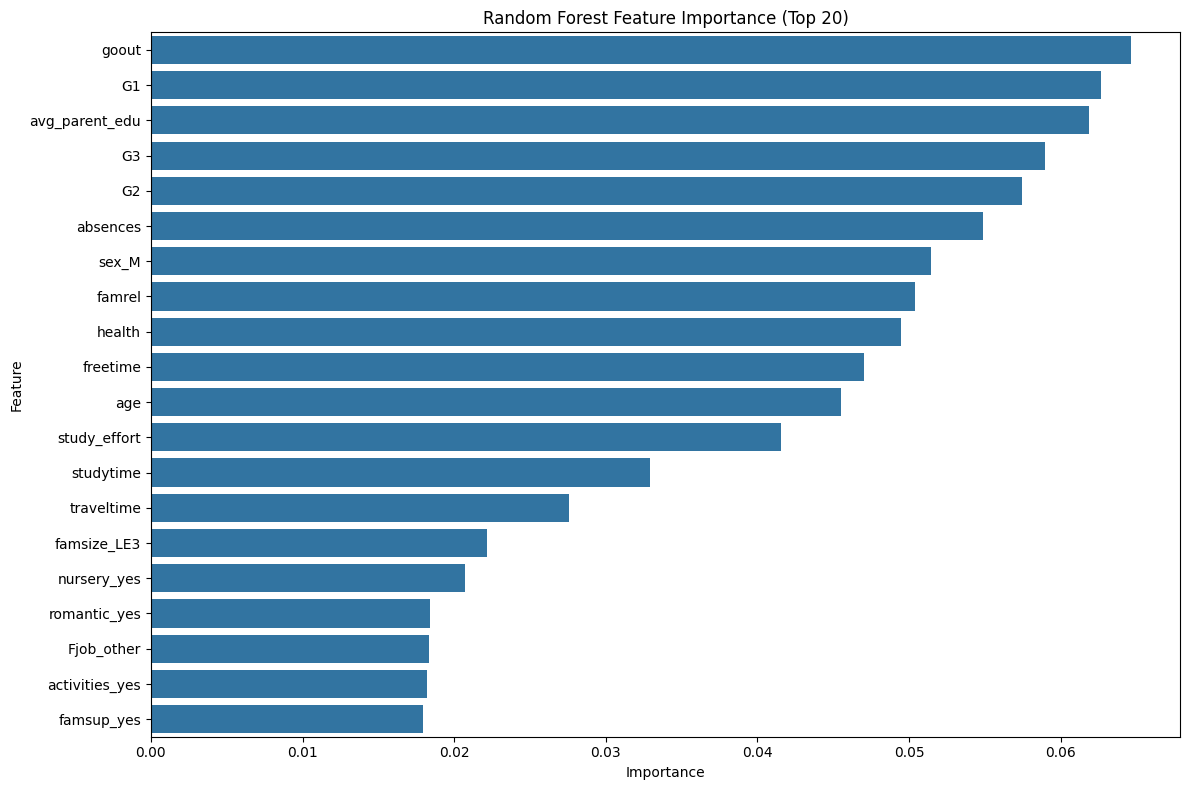

In [33]:
rf_model = joblib.load('random_forest_model.pkl')

X_train_encoded = pd.read_csv('X_train_engineered.csv')
X_train_encoded = pd.get_dummies(X_train_encoded, drop_first=True)

feature_importances = rf_model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': feature_importances
})

features_df = features_df.sort_values(by='Importance', ascending=False)

print("Top 10 Feature Importances for Random Forest Model:")
display(features_df.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(20))
plt.title('Random Forest Feature Importance (Top 20)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Local explanation

* Show the *instance of interest* - a row in the dataframe
* Use both models to classify the chosen instance
* Do both models assign the same class?
* What is the confidence (probability) of the prediction?
* If you change the value of the attribute of interest in the instance of interest, how does the classification of the instance change?

In [34]:
# Instance if interest
# find instance that both RF and DT predicted wrong
best_rf = joblib.load("random_forest_model.pkl")
y_pred_rf_all = best_rf.predict(X_test_encoded)
best_dt = joblib.load("decision_tree_model.pkl")
y_pred_dt_all = best_dt.predict(X_test_encoded)
expected_columns = X_train_encoded.columns.tolist()

common_fn_indices = y_test[
    (y_test == 1) &
    (y_pred_rf_all == 0) &
    (y_pred_dt_all == 0)
].index

# pick instance
if len(common_fn_indices) > 0:
    instance_index = common_fn_indices[0]
else:
    print("No such instance. ")


# Load instance
instance_raw = X_test.loc[[instance_index]]
display(instance_raw)
actual_y = y_test.loc[instance_index]

instance_encoded = pd.get_dummies(instance_raw, drop_first=True)
instance_final = instance_encoded.reindex(columns=expected_columns, fill_value=0)

rf_pred = best_rf.predict(instance_final)[0]
rf_proba = best_rf.predict_proba(instance_final)[0]
dt_pred = best_dt.predict(instance_final)[0]
dt_proba = best_dt.predict_proba(instance_final)[0]
print(f"RF Prediction: {rf_pred} (Proba Low/High: {rf_proba[0]:.3f}/{rf_proba[1]:.3f}")
print(f"DT Prediction: {dt_pred} (Proba Low/High: {dt_proba[0]:.3f}/{dt_proba[1]:.3f}")
print(f"Instance index: {instance_index}")

,school,sex,age,famsize,Pstatus,Mjob,Fjob,traveltime,studytime,failures,...,famrel,freetime,goout,health,absences,G1,G2,G3,study_effort,avg_parent_edu
3,GP,F,17,GT3,T,at_home,other,1,1,0,...,4,2,5,5,2,11,12,11,1.0,3.0


RF Prediction: 0 (Proba Low/High: 0.640/0.360
DT Prediction: 0 (Proba Low/High: 1.000/0.000
Instance index: 3


In [35]:
# Result of changing 'goout' for different values
goout_original = instance_final['goout'].iloc[0]

goout_values_to_test = [1, 2, 3, 4, 5] # The values to test (scale 1-5)

for goout_value in goout_values_to_test:
    instance_changed = instance_final.copy()
    instance_changed['goout'] = goout_value

    # Random Forest Predictions
    rf_pred_changed = best_rf.predict(instance_changed)[0]
    rf_proba_changed = best_rf.predict_proba(instance_changed)[0]

    # Decision Tree Predictions
    dt_pred_changed = best_dt.predict(instance_changed)[0]
    dt_proba_changed = best_dt.predict_proba(instance_changed)[0]

    print(f"\n--- From Goout: {goout_original}, To Goout: {goout_value} ---")
    print(f"RF Prediction when Goout={goout_value}: {rf_pred_changed} (Proba Low/High: {rf_proba_changed[0]:.3f}/{rf_proba_changed[1]:.3f})")
    print(f"DT Prediction when Goout={goout_value}: {dt_pred_changed} (Proba Low/High: {dt_proba_changed[0]:.3f}/{dt_proba_changed[1]:.3f})")


--- From Goout: 5, To Goout: 1 ---
RF Prediction when Goout=1: 0 (Proba Low/High: 0.780/0.220)
DT Prediction when Goout=1: 0 (Proba Low/High: 1.000/0.000)

--- From Goout: 5, To Goout: 2 ---
RF Prediction when Goout=2: 0 (Proba Low/High: 0.760/0.240)
DT Prediction when Goout=2: 0 (Proba Low/High: 1.000/0.000)

--- From Goout: 5, To Goout: 3 ---
RF Prediction when Goout=3: 0 (Proba Low/High: 0.750/0.250)
DT Prediction when Goout=3: 0 (Proba Low/High: 1.000/0.000)

--- From Goout: 5, To Goout: 4 ---
RF Prediction when Goout=4: 0 (Proba Low/High: 0.625/0.375)
DT Prediction when Goout=4: 0 (Proba Low/High: 1.000/0.000)

--- From Goout: 5, To Goout: 5 ---
RF Prediction when Goout=5: 0 (Proba Low/High: 0.640/0.360)
DT Prediction when Goout=5: 0 (Proba Low/High: 1.000/0.000)


In [36]:
# Result of changing 'goout' for different values
goout_original = instance_final['sex_M'].iloc[0]

goout_values_to_test = [True, False] # The values to test (scale 1-5)

for goout_value in goout_values_to_test:
    instance_changed = instance_final.copy()
    instance_changed['sex_M'] = goout_value

    # Random Forest Predictions
    rf_pred_changed = best_rf.predict(instance_changed)[0]
    rf_proba_changed = best_rf.predict_proba(instance_changed)[0]

    # Decision Tree Predictions
    dt_pred_changed = best_dt.predict(instance_changed)[0]
    dt_proba_changed = best_dt.predict_proba(instance_changed)[0]

    print(f"\n--- From sex_M: {goout_original}, To sex_M: {goout_value} ---")
    print(f"RF Prediction when sex_M={goout_value}: {rf_pred_changed} (Proba Low/High: {rf_proba_changed[0]:.3f}/{rf_proba_changed[1]:.3f})")
    print(f"DT Prediction when sex_M={goout_value}: {dt_pred_changed} (Proba Low/High: {dt_proba_changed[0]:.3f}/{dt_proba_changed[1]:.3f})")


--- From sex_M: 0, To sex_M: True ---
RF Prediction when sex_M=True: 1 (Proba Low/High: 0.385/0.615)
DT Prediction when sex_M=True: 1 (Proba Low/High: 0.000/1.000)

--- From sex_M: 0, To sex_M: False ---
RF Prediction when sex_M=False: 0 (Proba Low/High: 0.640/0.360)
DT Prediction when sex_M=False: 0 (Proba Low/High: 1.000/0.000)


In [37]:
# Result of changing 'absences' for different values
goout_original = instance_final['absences'].iloc[0]

goout_values_to_test = [1, 2, 3, 4, 5] # The values to test (scale 1-5)

for goout_value in goout_values_to_test:
    instance_changed = instance_final.copy()
    instance_changed['absences'] = goout_value

    # Random Forest Predictions
    rf_pred_changed = best_rf.predict(instance_changed)[0]
    rf_proba_changed = best_rf.predict_proba(instance_changed)[0]

    # Decision Tree Predictions
    dt_pred_changed = best_dt.predict(instance_changed)[0]
    dt_proba_changed = best_dt.predict_proba(instance_changed)[0]

    print(f"\n--- From Absences: {goout_original}, To Absences: {goout_value} ---")
    print(f"RF Prediction when Absences={goout_value}: {rf_pred_changed} (Proba Low/High: {rf_proba_changed[0]:.3f}/{rf_proba_changed[1]:.3f})")
    print(f"DT Prediction when Absences={goout_value}: {dt_pred_changed} (Proba Low/High: {dt_proba_changed[0]:.3f}/{dt_proba_changed[1]:.3f})")


--- From Absences: 2, To Absences: 1 ---
RF Prediction when Absences=1: 0 (Proba Low/High: 0.655/0.345)
DT Prediction when Absences=1: 0 (Proba Low/High: 1.000/0.000)

--- From Absences: 2, To Absences: 2 ---
RF Prediction when Absences=2: 0 (Proba Low/High: 0.640/0.360)
DT Prediction when Absences=2: 0 (Proba Low/High: 1.000/0.000)

--- From Absences: 2, To Absences: 3 ---
RF Prediction when Absences=3: 0 (Proba Low/High: 0.635/0.365)
DT Prediction when Absences=3: 0 (Proba Low/High: 1.000/0.000)

--- From Absences: 2, To Absences: 4 ---
RF Prediction when Absences=4: 0 (Proba Low/High: 0.625/0.375)
DT Prediction when Absences=4: 0 (Proba Low/High: 1.000/0.000)

--- From Absences: 2, To Absences: 5 ---
RF Prediction when Absences=5: 0 (Proba Low/High: 0.615/0.385)
DT Prediction when Absences=5: 1 (Proba Low/High: 0.422/0.578)


# Conclusion
Summarize the results, answering questions such as:

1.	Which machine learning result has the highest value and is most interesting?
2.	What setting provided the best result?
3.	Which attributes are the most important?


1.
Which machine learning result has the highest value and is most interesting?
The Random Forest model had the highest Accuracy (75.1%). It was better than the Decision Tree (67.5%) and the Baseline model (69.9%).

However, the most interesting result comes from the Cost Analysis. Even though the Decision Tree was less accurate, it had a lower total cost (775) than the Random Forest (830). This happened because the Decision Tree correctly identified more high-risk students (34 students) compared to the Random Forest (25 students). Since missing a high-risk student is expensive (cost 20), the Decision Tree was the cheaper option.

Also, the model showed an interesting result about gender. In the specific example we tested, changing the gender from Female to Male changed the prediction from "Low" to "High." This shows that gender is a very strong factor for the model.


2.
What setting provided the best result?
It depends on what is more important for you:

For General Accuracy: The Random Forest is the best setting. It has the highest accuracy (75.1%) and makes fewer mistakes overall.

For Lower Cost: The Decision Tree provided the best result. It is better at finding the "High Consumption" students. Because the penalty for missing these students is high, the Decision Tree minimizes the risk better.

Conclusion: Random Forest is generally the stronger model, but Decision Tree is better if the main goal is to catch every high-risk student.


3.
Which attributes are the most important?
Both models agree on the main factors that influence alcohol consumption:

goout: Going out with friends. This is the most important factor in both models.

sex_M: Gender (being male). This is a very strong predictor.

Grades (G1, G2, G3): Academic results, especially the first period grade (G1), are very important.

absences: The number of times a student missed school.

avg_parent_edu: The education level of parents (specifically in the Random Forest model).

# Optional parts

## Evaluation  - cost based

In [38]:
# Cost comparison from trained models
results_data = {
    "Model": ["Decision Tree", "Random Forest", "Baseline"],
    "Accuracy": [0.675, 0.751, 0.699],
    "F1 Score (Macro)": [0.629, 0.660, 0.411],
    "False Negatives (FN)": [29, 38, 63],
    "False Positives (FP)": [39, 14, 0],
    "Total Cost": [775, 830, 1260]
}

results_df = pd.DataFrame(results_data)

# Results
print("\n--- Final Cost-Based Evaluation ---")
display(results_df.style.highlight_min(subset=["Total Cost", "False Negatives (FN)"], color='green')
                        .highlight_max(subset=["Accuracy", "F1 Score (Macro)"], color='blue'))

# Interpretation
print(f"Lowest total cost Decision Tree ({results_data['Total Cost'][0]}), but its accuracy is worse than Random Forest.")
print(f"Deceision tree makes less expensive mistakes (FN={results_data['False Negatives (FN)'][0]}) then Random Forest (FN={results_data['False Negatives (FN)'][1]}).")
print("Random Forest has better accuracy, but is less likely to find instance in risk (student with alcohol consumption problem).")


--- Final Cost-Based Evaluation ---


,Model,Accuracy,F1 Score (Macro),False Negatives (FN),False Positives (FP),Total Cost
0,Decision Tree,0.675000,0.629000,29,39,775
1,Random Forest,0.751000,0.660000,38,14,830
2,Baseline,0.699000,0.411000,63,0,1260


Lowest total cost Decision Tree (775), but its accuracy is worse than Random Forest.
Deceision tree makes less expensive mistakes (FN=29) then Random Forest (FN=38).
Random Forest has better accuracy, but is less likely to find instance in risk (student with alcohol consumption problem).


### Ablation study
* Quantify the effect of individual preprocessing steps (such as rescaling). How would the performance change if you have not performed this step (optional).

In [39]:
# === ABLATION STUDY ===

# Load data from trainsplit (without feature engineering)
X_train_raw = pd.read_csv("X_train.csv")
X_test_raw = pd.read_csv("X_test.csv")

# Load data with feature engineering
X_train_eng = pd.read_csv("X_train_engineered.csv")
X_test_eng = pd.read_csv("X_test_engineered.csv")

# Load target feature
y_train = pd.read_csv("y_train.csv").values.ravel()
y_test = pd.read_csv("y_test.csv").values.ravel()

# One-Hot Encoding
X_train_raw_enc = pd.get_dummies(X_train_raw, drop_first=True)
X_test_raw_enc = pd.get_dummies(X_test_raw, drop_first=True)

# Raw data comparison
X_test_raw_enc = X_test_raw_enc.reindex(columns=X_train_raw_enc.columns, fill_value=0)

X_train_eng_enc = pd.get_dummies(X_train_eng, drop_first=True)
X_test_eng_enc = pd.get_dummies(X_test_eng, drop_first=True)
# Engineered data conparison
X_test_eng_enc = X_test_eng_enc.reindex(columns=X_train_eng_enc.columns, fill_value=0)

# No feature engineering
rf_raw = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)
rf_raw.fit(X_train_raw_enc, y_train)
acc_raw = accuracy_score(y_test, rf_raw.predict(X_test_raw_enc))

# Engineered features - accuracy of our best RF model
acc_eng = accuracy_best_rf


# Results
print(f"Accuracy (Original features): {acc_raw:.4f}")
print(f"Accuracy (Engineered features): {acc_eng:.4f}")
print(f"Rozdíl (Effect of preprocessing): {acc_eng - acc_raw:+.4f}")

Accuracy (Original features): 0.7799
Accuracy (Engineered features): 0.7512
Rozdíl (Effect of preprocessing): -0.0287


In [40]:
# Data leakage prevention by deleting Walc column in preprocessing

# Load data from preprocesing with walc and Dalc_binary (no feature engineering was done, only converted dalc to dalc_binary and droped dalc column)
df_leakage = pd.read_csv("student_preprocessed_with_walc.csv")

X_w = df_leakage.drop(columns=['Dalc_binary'])
y_w = df_leakage['Dalc_binary']

# Split with same random_state applied
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X_w, y_w, test_size=0.2, random_state=42, stratify=y_w
)

# Apply feature engineering to data with walc
if 'studytime' in X_train_w.columns and 'failures' in X_train_w.columns:
    X_train_w['study_effort'] = X_train_w['studytime'] / (X_train_w['failures'] + 1)
    X_test_w['study_effort'] = X_test_w['studytime'] / (X_test_w['failures'] + 1)
if 'Medu' in X_train_w.columns and 'Fedu' in X_train_w.columns:
    X_train_w['avg_parent_edu'] = (X_train_w['Medu'] + X_train_w['Fedu']) / 2
    X_test_w['avg_parent_edu'] = (X_test_w['Medu'] + X_test_w['Fedu']) / 2

to_drop = ['address', 'guardian', 'reason','Medu', 'Fedu']
X_train_w = X_train_w.drop(columns=[col for col in to_drop if col in X_train_w.columns], errors='ignore')
X_test_w = X_test_w.drop(columns=[col for col in to_drop if col in X_test_w.columns], errors='ignore')

# 2. ENCODING for data with walc
X_train_w_enc = pd.get_dummies(X_train_w, drop_first=True)
X_test_w_enc = pd.get_dummies(X_test_w, drop_first=True)
X_test_w_enc = X_test_w_enc.reindex(columns=X_train_w_enc.columns, fill_value=0)


# Load engineered data that was used for original modeling
X_train_eng = pd.read_csv("X_train_engineered.csv")
X_test_eng = pd.read_csv("X_test_engineered.csv")

# Encoding
X_train_eng_enc = pd.get_dummies(X_train_eng, drop_first=True)
X_test_eng_enc = pd.get_dummies(X_test_eng, drop_first=True)
X_test_eng_enc = X_test_eng_enc.reindex(columns=X_train_eng_enc.columns, fill_value=0)

## Testing with random forest

# with Walc
rf_leakage = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)
rf_leakage.fit(X_train_w_enc, y_train_w)
acc_leakage = accuracy_score(y_test_w, rf_leakage.predict(X_test_w_enc))

# Without Walc - our best RF
acc_final = accuracy_best_rf

print("=== Ablation Study: Impact of Walc Column ===")
print(f"Accuracy WITH Walc (Leaky Model):    {acc_leakage:.4f}")
print(f"Accuracy WITHOUT Walc (Final Model): {acc_final:.4f}")
print(f"Difference (Inflation by Walc):      {acc_leakage - acc_final:+.4f}")

=== Ablation Study: Impact of Walc Column ===
Accuracy WITH Walc (Leaky Model):    0.8421
Accuracy WITHOUT Walc (Final Model): 0.7512
Difference (Inflation by Walc):      +0.0909


###  Optimization of threshold (optional)

* If you would change the probability (score) threshold for classification, would you obtain better results in terms of total costs? For which threshold?

Threshold  Cost       FN    FP   
-----------------------------------
0.1       630        0     126  
0.2       420        3     72   
0.3       510        18    30   
0.4       615        27    15   
0.5       810        37    14   
0.6       860        42    4    
0.7       1125       56    1    
0.8       1200       60    0    
0.9       1260       63    0    


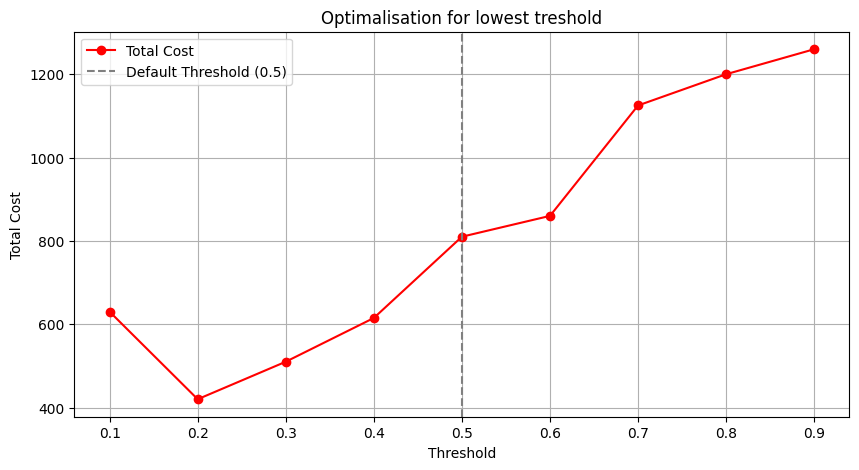


--- Optimalisation of Random Forest---
Previously with treshold 0.5: 810
Optimal treshold:             0.2
Minimal cost:             420
The Random forest model benefits from lowering the treshold for class 1 (at risk for alcohol consumption) to 0,2.


In [41]:
# Costs
COST_FP = 5   # cost False Positive
COST_FN = 20  # cost False Negative

thresholds = np.arange(0.1, 1.0, 0.1)
costs = []
f1_scores = []

# Probability of instances for Class 1 (at risk of alcohol consumption)
y_proba_rf = best_rf.predict_proba(X_test_encoded)[:, 1]

print(f"{'Threshold':<10} {'Cost':<10} {'FN':<5} {'FP':<5}")
print("-" * 35)

for thr in thresholds:
    # If probability is >= thr, class as 1, else 0
    y_pred_thr = (y_proba_rf >= thr).astype(int)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thr).ravel()

    # Cost at thr
    total_cost = (fp * COST_FP) + (fn * COST_FN)
    costs.append(total_cost)

    print(f"{thr:.1f}       {total_cost:<10} {fn:<5} {fp:<5}")

# Graph
plt.figure(figsize=(10, 5))
plt.plot(thresholds, costs, marker='o', color='red', label='Total Cost')
plt.axvline(x=0.5, color='grey', linestyle='--', label='Default Threshold (0.5)')
plt.title('Optimalisation for lowest treshold')
plt.xlabel('Threshold')
plt.ylabel('Total Cost')
plt.legend()
plt.grid(True)
plt.show()

# Result
best_index = np.argmin(costs)
best_thr = thresholds[best_index]
min_cost = costs[best_index]

print(f"\n--- Optimalisation of Random Forest---")
print(f"Previously with treshold 0.5: {costs[4]}")
print(f"Optimal treshold:             {best_thr:.1f}")
print(f"Minimal cost:             {min_cost}")
print("The Random forest model benefits from lowering the treshold for class 1 (at risk for alcohol consumption) to 0,2.")

## Explanation

*	Apply ICE/IME/SHAPLEY/Anchors to explain the classification of the instance

# Final checklist

-	Are all preprocessing steps justified?
-	Did you try different metaparameter values where appropriate?
-	Are the results replicable? If you have the same data, does the report describe all steps in sufficient detail to obtain the same results as reported by the authors?
-	Were proper evaluation metrics selected? Are the results correctly interpreted?
-	Are all important steps explained and justified?
-	What is the quality of writing? Is the language clear and concise?


# Submission

* This .ipynb file with your code + its html version after the code was run (File-Save and export notebook as - html)
* Source data or a link to source data or source data being loaded from a url in the notebook
* Data files after preprorcessing (train.csv and test.csv)